In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping

#_Load_the_datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\melanoma_cancer_dataset\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),  # Adjusted to MobileNet's default input size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\melanoma_cancer_dataset\test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224,224),
)

# Save the number of classes before mapping
num_classes = len(train_ds.class_names)

# Normalize the images
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Load the MobileNet model as a base model
base_model = tf.keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model layers to prevent their weights from updating during training
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce spatial dimensions
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
# Add the output layer with the correct number of classes
output = Dense(num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    epochs=32,
    validation_data=validation_ds,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)












Found 9605 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/32
301/301 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.8575 - loss: 0.3109 - val_accuracy: 0.8970 - val_loss: 0.2613
Epoch 2/32
301/301 ━━━━━━━━━━━━━━━━━━━━ 261s 868ms/step - accuracy: 0.9219 - loss: 0.2019 - val_accuracy: 0.8970 - val_loss: 0.2533
Epoch 3/32
301/301 ━━━━━━━━━━━━━━━━━━━━ 258s 855ms/step - accuracy: 0.9303 - loss: 0.1805 - val_accuracy: 0.9040 - val_loss: 0.2376
Epoch 4/32
301/301 ━━━━━━━━━━━━━━━━━━━━ 257s 853ms/step - accuracy: 0.9415 - loss: 0.1607 - val_accuracy: 0.8930 - val_loss: 0.2774
Epoch 5/32
301/301 ━━━━━━━━━━━━━━━━━━━━ 254s 842ms/step - accuracy: 0.9408 - loss: 0.1490 - val_accuracy: 0.9030 - val_loss: 0.2742
Epoch 6/32
301/301 ━━━━━━━━━━━━━━━━━━━━ 269s 891ms/step - accuracy: 0.9425 - loss: 0.1434 - val_accuracy: 0.9050 - val_loss: 0.2675


In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


# Get the final accuracy after the last epoch:
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]
print(f"Final Training Accuracy: {final_train_accuracy*100}")
print(f"Final Validation Accuracy: {final_val_accuracy*100}")

Final Training Accuracy: 94.58615183830261
Final Validation Accuracy: 90.49999713897705


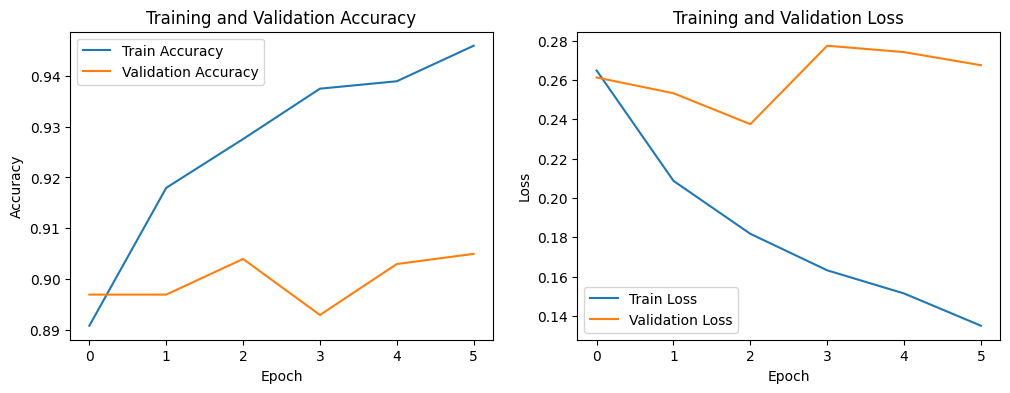

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Plot training & validation accuracy and loss values
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.show()

plot_training_history(history)



Found 9605 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s

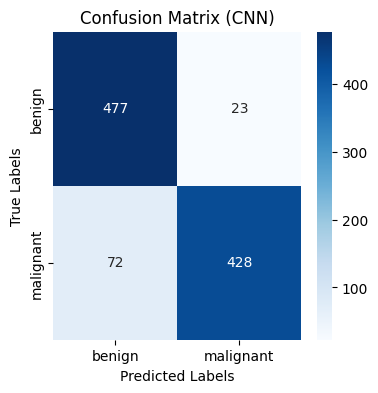

Classification Report:

              precision    recall  f1-score   support

      benign       0.87      0.95      0.91       500
   malignant       0.95      0.86      0.90       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.90      1000



In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\melanoma_cancer_dataset\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\melanoma_cancer_dataset\test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

# Save class names BEFORE applying .map
class_names = train_ds.class_names

# Normalize the datasets
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Generate predictions
y_true = []
y_pred = []

for images, labels in validation_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (CNN)")
plt.show()

# Generate classification report
print("Classification Report:\n")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)
